# Dengue Prediction System by using Machine Learning For SriLanka

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
dengue_dataset = pd.read_csv("DengueDataset.csv")
dengue_dataset.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
0          1       0           0         0       0                 0   
1          1       0           0         0       0                 0   
2          0       0           0         0       0                 0   
3          1       0           0         0       0                 0   
4          1       0           0         0       0                 0   

   pain_behind_the_eyes  back_pain  malaise  muscle_pain  red_spots_over_body  \
0                     0          0        0            0                    0   
1                     0          0        0            0                    0   
2                     0          0        0            0                    0   
3                     0          0        0            0                    0   
4                     0          0        0            0                    0   

   prognosis  
0          0  
1          0  
2          0  
3          0  
4          0

In [3]:
len(dengue_dataset)

4920

In [4]:
print(dengue_dataset.shape)

(4920, 12)


In [5]:
## plot the full dataset by using histogram

<Figure size 640x480 with 0 Axes>

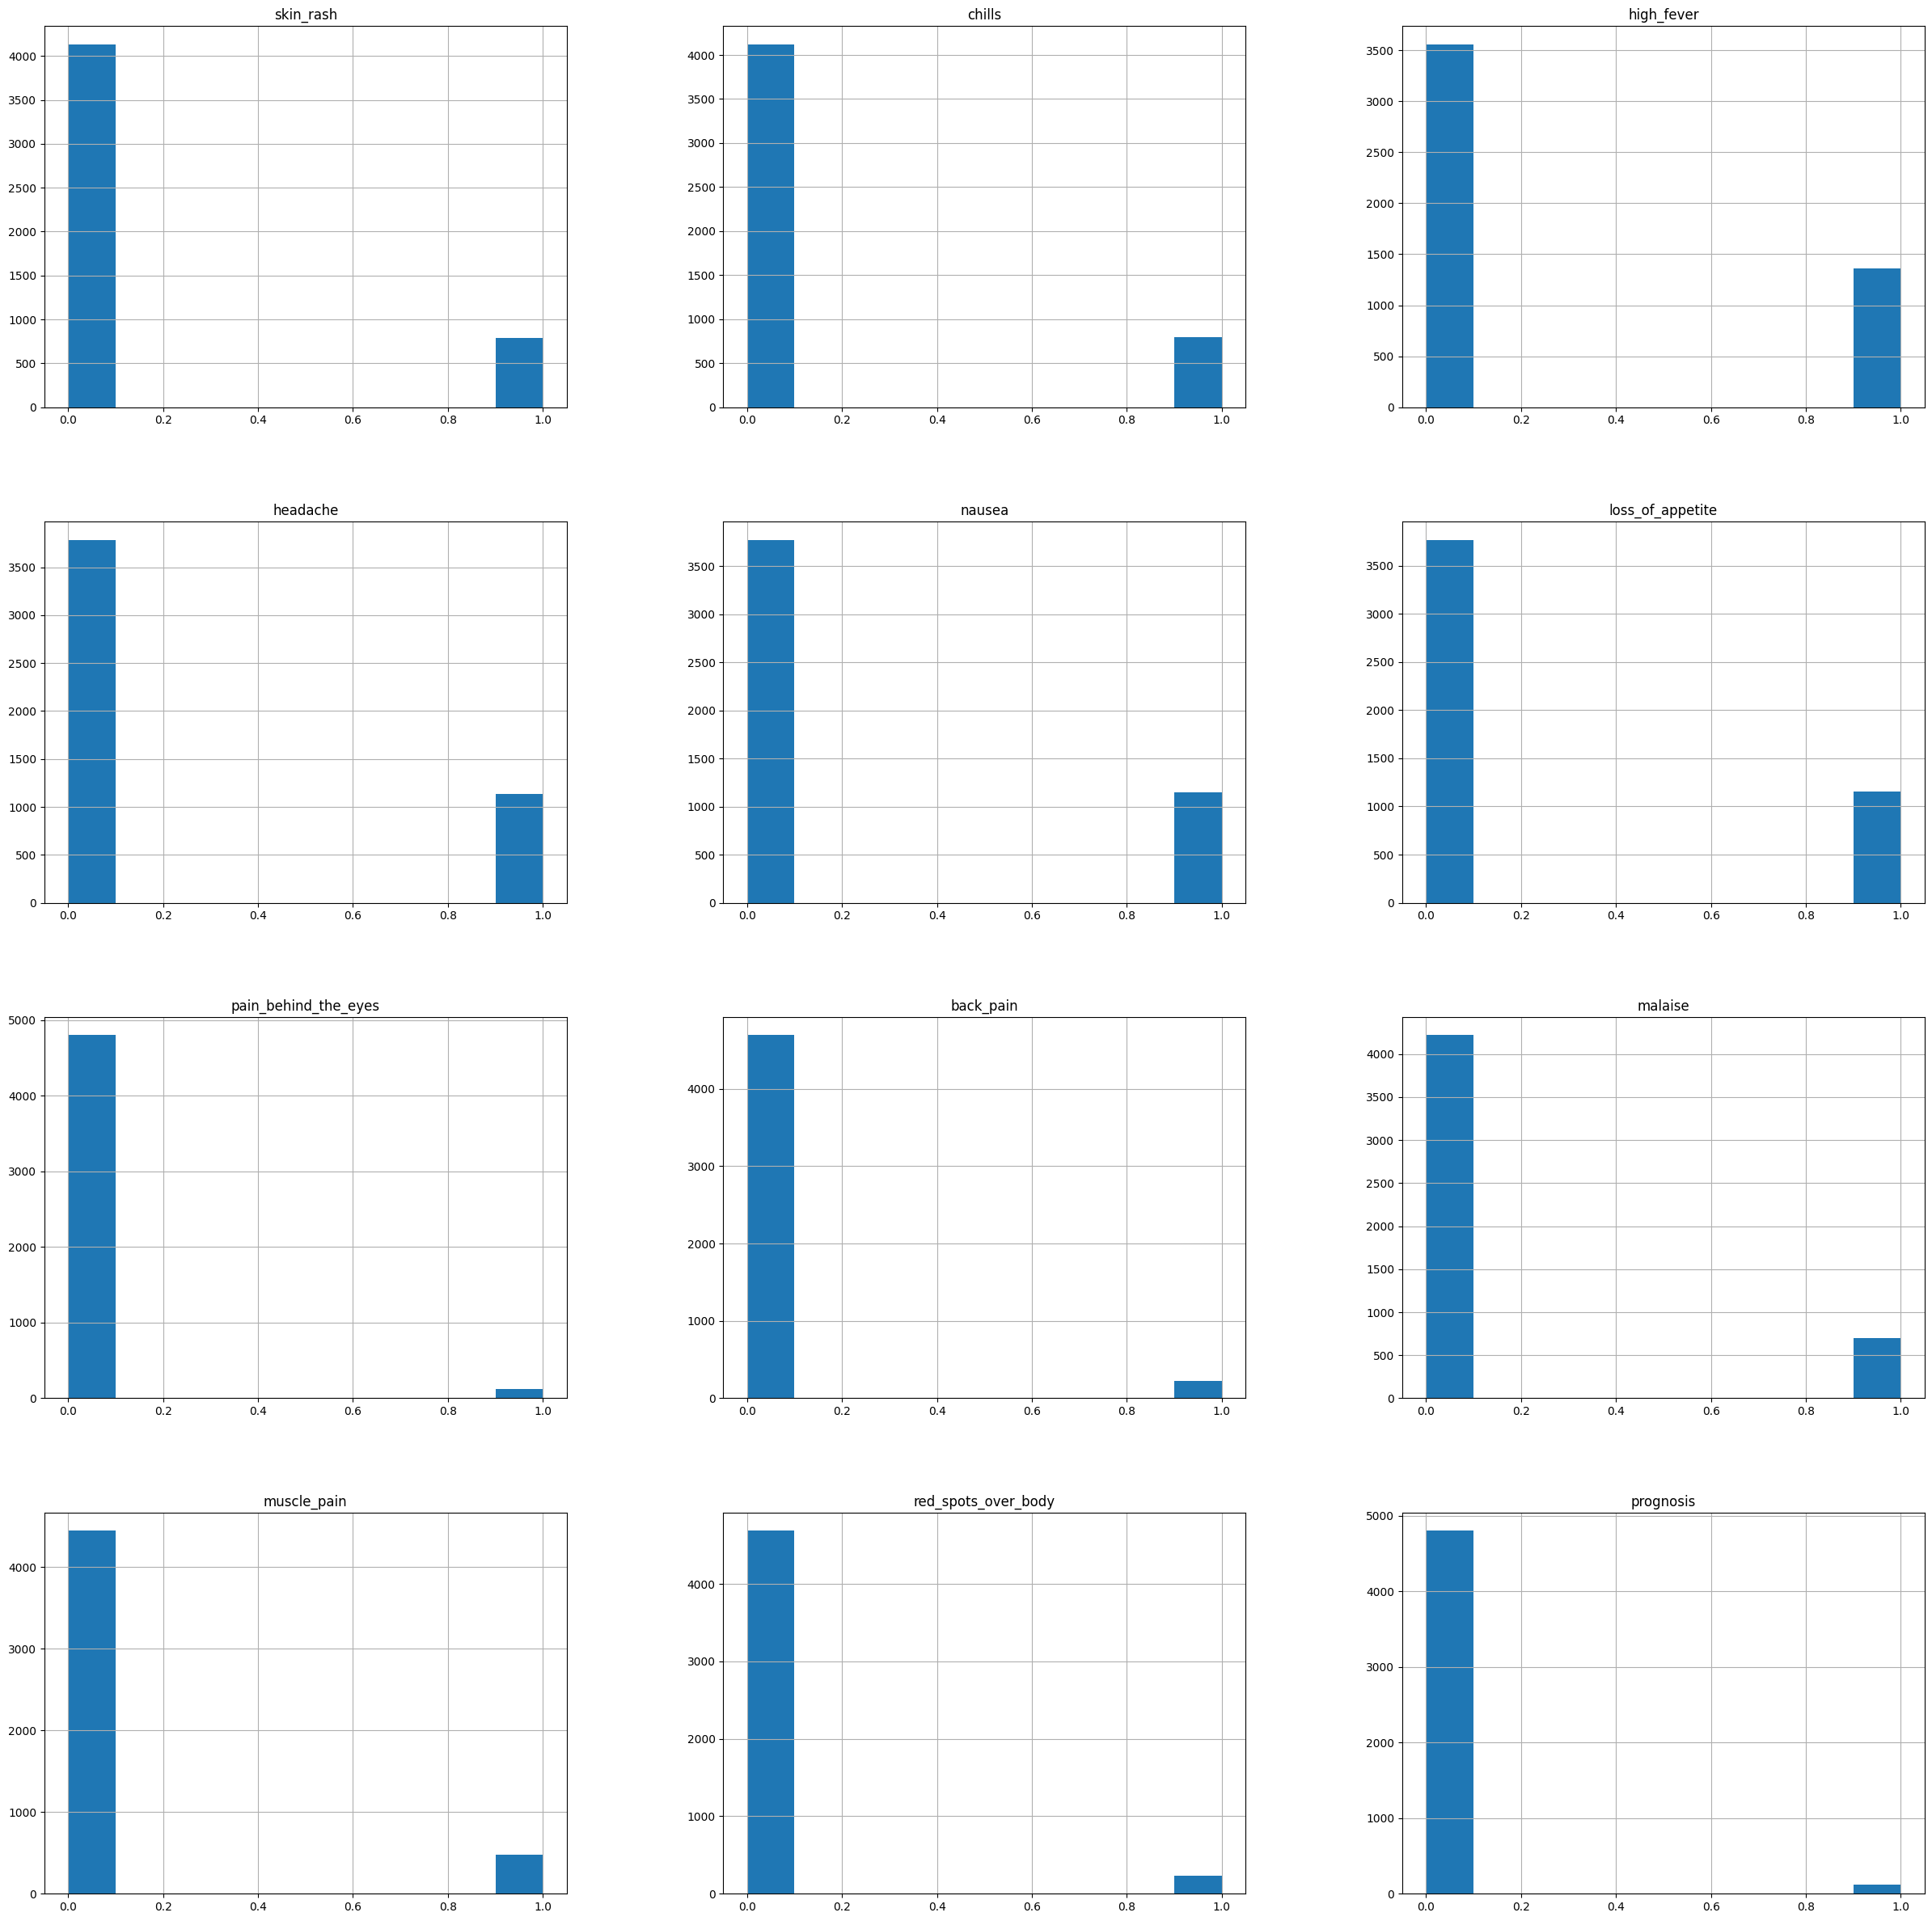

In [6]:
%matplotlib inline
plt.subplots_adjust(left=1.2, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)
dengue_dataset.hist(bins=10, figsize=(30,30))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(dengue_dataset, test_size=0.2, random_state=42) 

In [8]:
training_set.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   

      red_spots_over_body  prognosis  
1807                    1          0  
184                     0          0  
205                     0          0  
4581                    0          0  
410                     0          0

In [9]:
print(training_set.shape)

(3936, 12)


In [10]:
# Plot training dataset by using histograms

<Figure size 640x480 with 0 Axes>

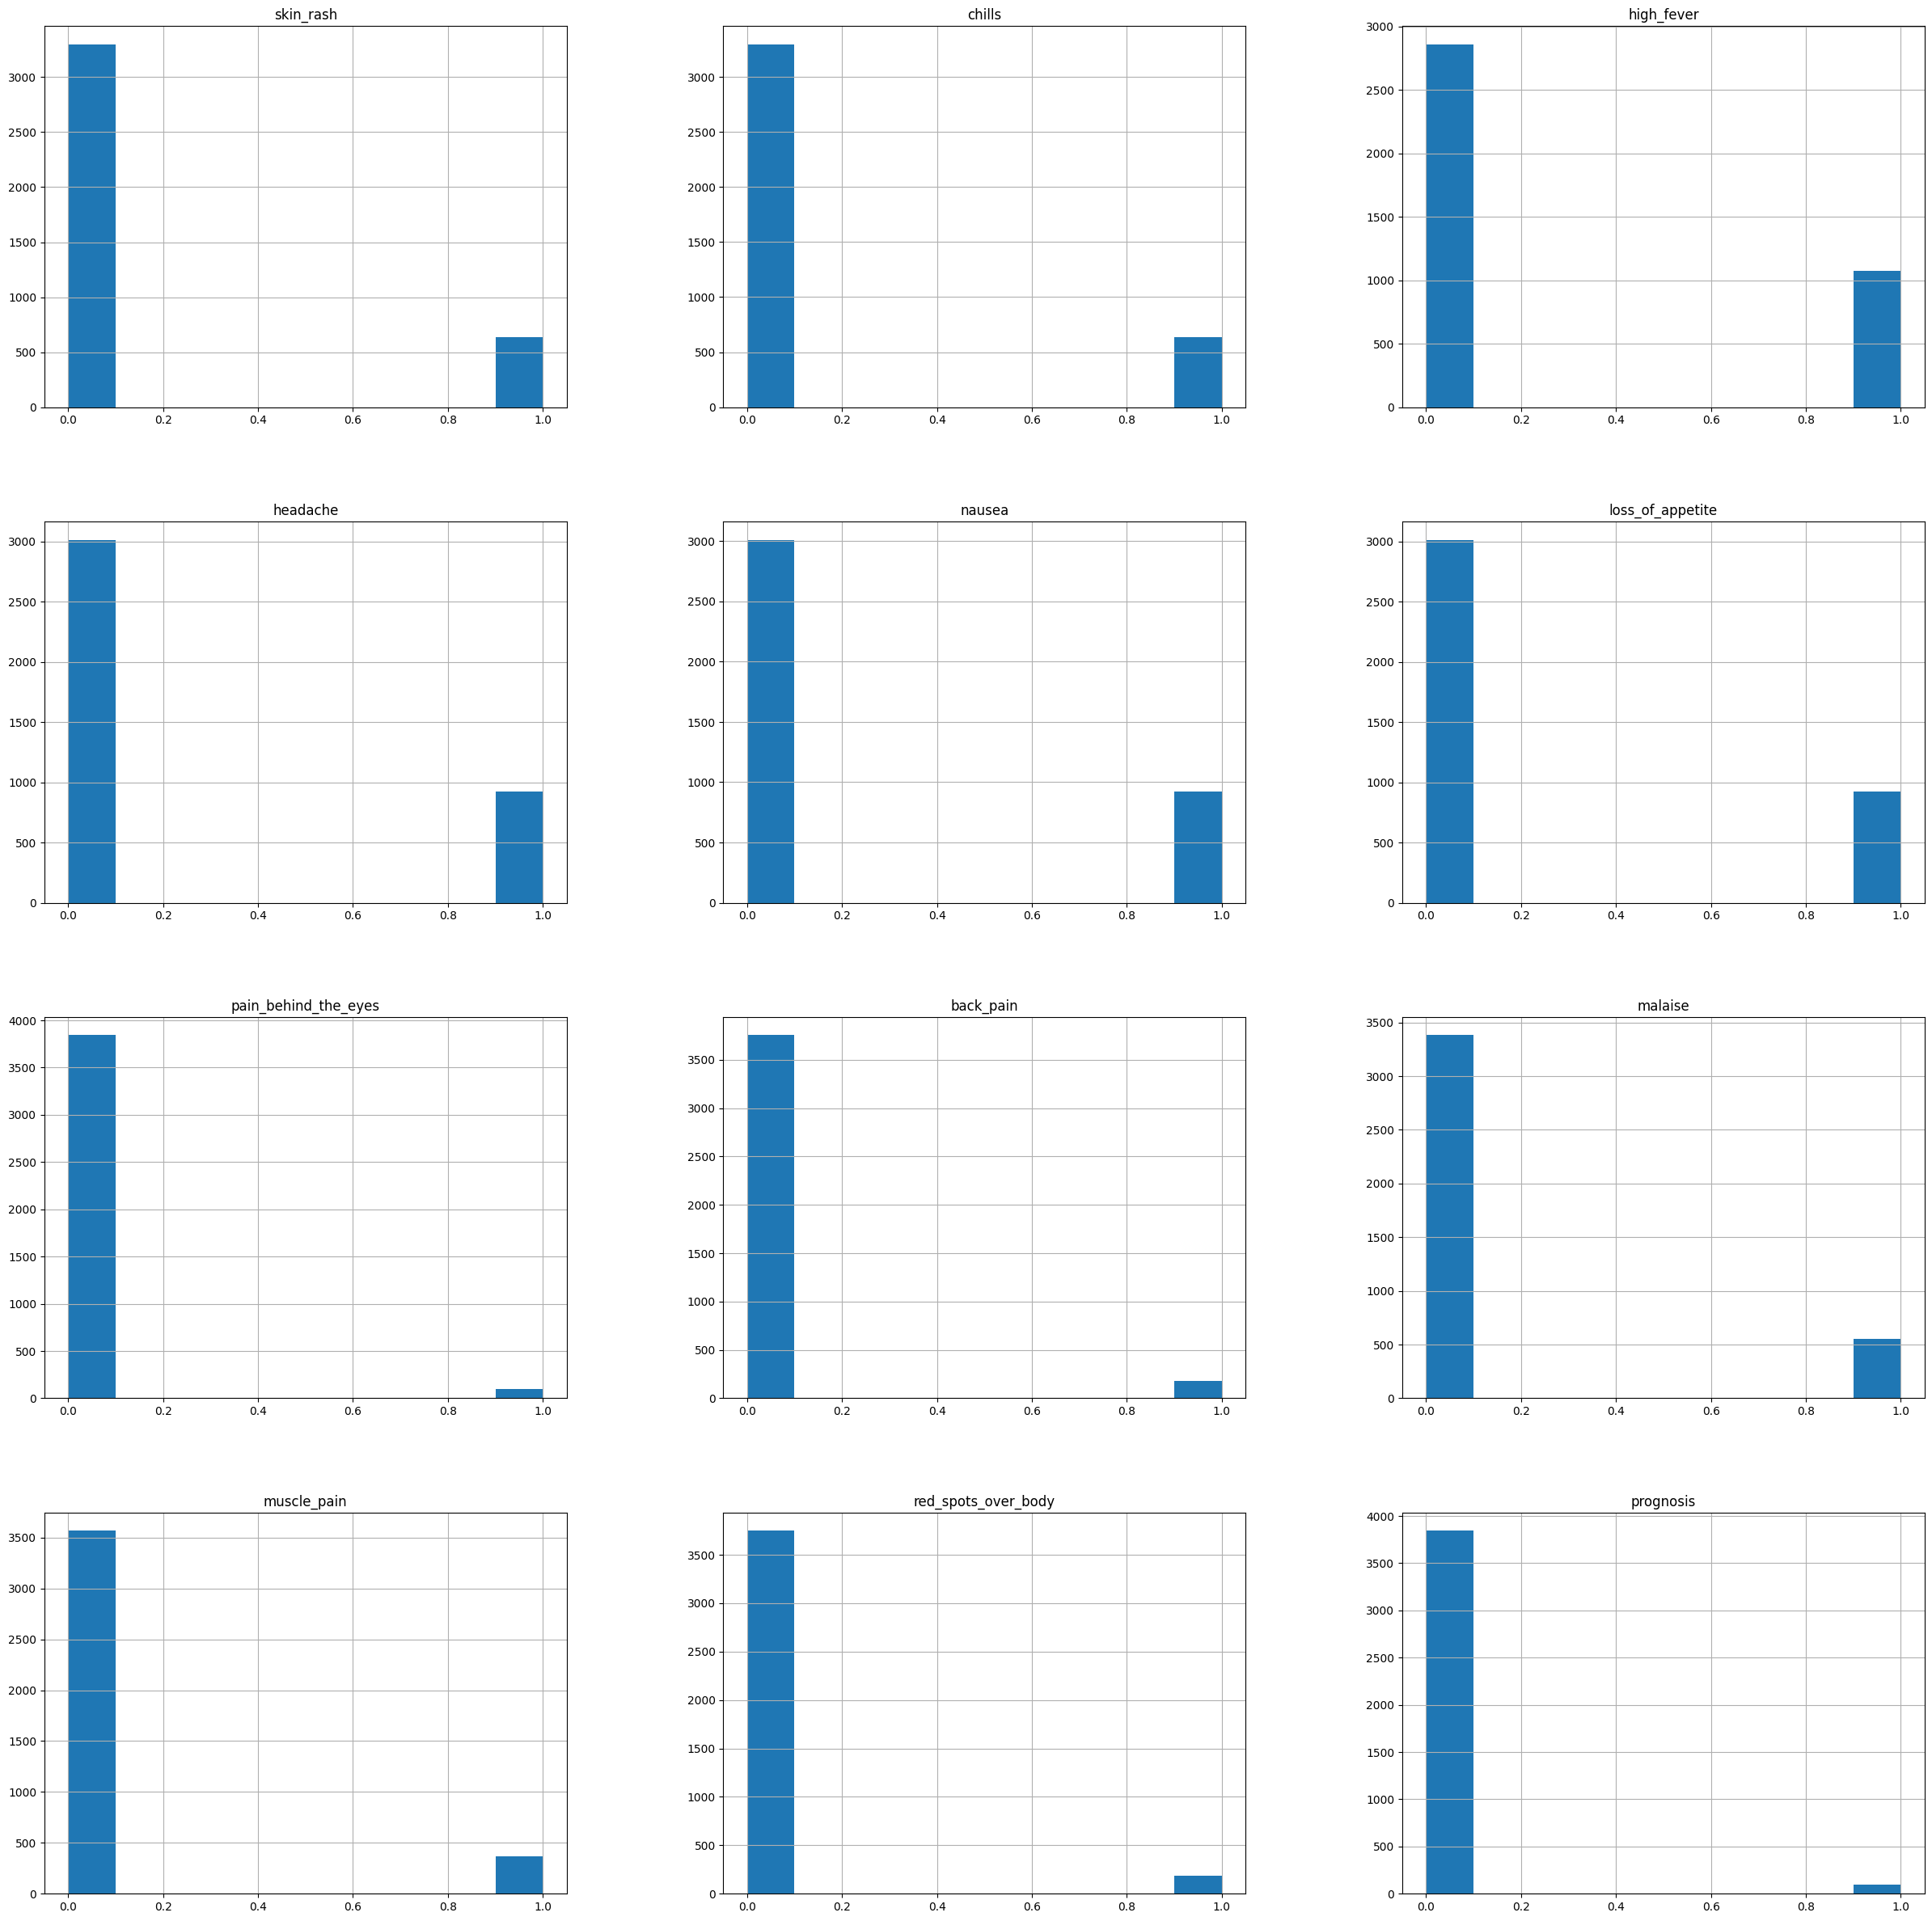

In [11]:
%matplotlib inline
plt.subplots_adjust(left=1.2, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)
training_set.hist(bins=10, figsize=(30,30))
plt.show()

In [12]:
print(training_set.dtypes)

skin_rash               int64
chills                  int64
high_fever              int64
headache                int64
nausea                  int64
loss_of_appetite        int64
pain_behind_the_eyes    int64
back_pain               int64
malaise                 int64
muscle_pain             int64
red_spots_over_body     int64
prognosis               int64
dtype: object


In [13]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3936 entries, 1807 to 860
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   skin_rash             3936 non-null   int64
 1   chills                3936 non-null   int64
 2   high_fever            3936 non-null   int64
 3   headache              3936 non-null   int64
 4   nausea                3936 non-null   int64
 5   loss_of_appetite      3936 non-null   int64
 6   pain_behind_the_eyes  3936 non-null   int64
 7   back_pain             3936 non-null   int64
 8   malaise               3936 non-null   int64
 9   muscle_pain           3936 non-null   int64
 10  red_spots_over_body   3936 non-null   int64
 11  prognosis             3936 non-null   int64
dtypes: int64(12)
memory usage: 399.8 KB


In [14]:
training_set.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
prognosis               0
dtype: int64

In [15]:
training_set["prognosis"].value_counts()

prognosis
0    3843
1      93
Name: count, dtype: int64

## Explotary Data Analysis (EDA) for training data

In [16]:
training_set.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
prognosis               0
dtype: int64

## Preparing the DataSet ML for (Machine Learning) Models

In [17]:
training_set.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   

      red_spots_over_body  prognosis  
1807                    1          0  
184                     0          0  
205                     0          0  
4581                    0          0  
410                     0          0

In [18]:
## our objective is predict dengue. in that case prognosis variable is already available. so then we can use the supervised learning method
 ## seperate the label and rest of the data

In [19]:
training_set_data = training_set.drop("prognosis", axis=1)

training_set_data.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   

      red_spots_over_body  
1807                    1  
184                     0  
205                     0  
4581                    0  
410                     0

In [20]:
training_set_data_label = training_set["prognosis"].copy()
training_set_data_label.head()

1807    0
184     0
205     0
4581    0
410     0
Name: prognosis, dtype: int64

In [21]:
len(training_set_data_label)

3936

In [22]:
training_set_data_label.isnull().sum()

0

In [23]:
## Data Cleaning

In [24]:
### check  any particular missing values are there

In [25]:
len(training_set_data)

3936

In [26]:
training_set_data.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
dtype: int64

In [27]:
### According to the above dataset missing values are not there then we dont need filling the missing values

In [28]:
training_set_data.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   

      red_spots_over_body  
1807                    1  
184                     0  
205                     0  
4581                    0  
410                     0

In [29]:
len(training_set_data)

3936

In [30]:
len(training_set_data_label)

3936

In [31]:
training_prepared_data_new_pd=training_set_data
training_prepared_data_new_pd.head(10)

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   
1049          0       0           0         0       1                 1   
2598          0       1           1         1       1                 0   
4272          0       0           0         0       0                 0   
3084          0       0           1         0       0                 0   
3658          0       0           1         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   
1049                     0          0        0            0   
2598                     0          0        0            1   
4272                     0          0        0            0   
3084                     0          0        0            0   
3658                     0          0        0            0   

      red_spots_over_body  
1807                    1  
184                     0  
205                     0  
4581                    0  
410                     0  
1049                    0  
2598                    0  
4272                    0  
3084                    0  
3658                    0

# Model selecting and training

In [32]:
from sklearn.model_selection import train_test_split

# Splitting train set into the training and validation set
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)



In [33]:
X_train_pd = pd.DataFrame(X_train, columns=training_set_data.columns)
X_train_pd.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1265          0       0           0         0       1                 0   
984           1       0           1         1       0                 1   
3592          0       1           1         0       0                 1   
1637          1       0           1         0       0                 0   
3790          0       1           1         1       1                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1265                     0          0        0            0   
984                      0          0        1            0   
3592                     0          0        1            0   
1637                     0          0        0            0   
3790                     0          0        0            0   

      red_spots_over_body  
1265                    0  
984                     1  
3592                    0  
1637                    0  
3790                    0

In [34]:
Y_train_pd = pd.DataFrame(y_train)
Y_train_pd.head()

prognosis
1265          0
984           0
3592          0
1637          0
3790          0

In [35]:
 #Import models
from sklearn.tree import DecisionTreeClassifier
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:

Dt_value_predictions = Dt_clf.predict(X_test)
Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [37]:
# Performance Measure Of Your Model

In [38]:

mse_Of_Dt = mean_squared_error(y_test, Dt_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Dt:.4f}")

Mean Squared Error (MSE): 0.0000


In [39]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=42)
Rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
Rf_value_predictions = Rf_clf.predict(X_test)
Rf_value_accuracy = accuracy_score(y_test, Rf_value_predictions)
print(f"\nValidation Accuracy: {Rf_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [41]:
# Performance Mesure Of Your Model

In [42]:
mse_Of_Rf = mean_squared_error(y_test, Rf_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Rf:.4f}")

Mean Squared Error (MSE): 0.0000


In [43]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=42)
LR_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [44]:
Lr_value_predictions = LR_clf.predict(X_test)
Lr_value_accuracy = accuracy_score(y_test, Lr_value_predictions)
print(f"\nValidation Accuracy: {Lr_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [45]:
 #Performance Mesure Of Your Model

In [46]:
mse_Of_Lr = mean_squared_error(y_test, Lr_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Lr:.4f}")

Mean Squared Error (MSE): 0.0000


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def modelEvaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("Logistic Regression")
LR_accuracy = modelEvaluation(LR_clf, X_test, y_test)

print("Decision Tree")
DT_accuracy = modelEvaluation(Dt_clf , X_test, y_test)

print("Random Forest classifier")
RF_accuracy = modelEvaluation(Rf_clf, X_test, y_test)

# Now you have the accuracy scores stored in variables for later use
print(f"LR Accuracy: {LR_accuracy:.4f}")
print(f"DT Accuracy: {DT_accuracy:.4f}")
print(f"RF Accuracy: {RF_accuracy:.4f}")

Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00        15

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[773   0]
 [  0  15]]
Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00        15

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[773   0]
 [  0  15]]
Random Forest classifier
Accuracy: 1.0000
Prec

## Handle the overfitting issue

In [48]:
#Remove the unnecessary coloumns

In [49]:

training_prepared_data_new_pd.head(10)

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   
1049          0       0           0         0       1                 1   
2598          0       1           1         1       1                 0   
4272          0       0           0         0       0                 0   
3084          0       0           1         0       0                 0   
3658          0       0           1         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   
1049                     0          0        0            0   
2598                     0          0        0            1   
4272                     0          0        0            0   
3084                     0          0        0            0   
3658                     0          0        0            0   

      red_spots_over_body  
1807                    1  
184                     0  
205                     0  
4581                    0  
410                     0  
1049                    0  
2598                    0  
4272                    0  
3084                    0  
3658                    0

In [50]:
training_prepared_data_new_pd.head(5)



skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   

      red_spots_over_body  
1807                    1  
184                     0  
205                     0  
4581                    0  
410                     0

In [51]:
## Save the newly created training dataset in .csv file

In [52]:
training_prepared_data_new_pd.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   

      red_spots_over_body  
1807                    1  
184                     0  
205                     0  
4581                    0  
410                     0

In [53]:
len(training_prepared_data_new_pd)

3936

In [54]:
training_prepared_data_new_pd.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1807          1       0           1         1       0                 0   
184           0       1           1         1       1                 0   
205           0       0           0         0       0                 1   
4581          0       0           0         0       0                 0   
410           1       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1807                     0          0        1            0   
184                      0          0        0            0   
205                      0          0        1            0   
4581                     0          0        0            0   
410                      0          0        0            0   

      red_spots_over_body  
1807                    1  
184                     0  
205                     0  
4581                    0  
410                     0

In [55]:
# check the null values

In [56]:
training_prepared_data_new_pd.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
dtype: int64

In [57]:
## Get the length of the training dataset

In [58]:
import numpy as np
np.size(training_prepared_data_new_pd)

43296

## grid search cv for parameter tuning,and Final model evaluvation

In [59]:
## Hyper parameter tuning and grid search cv for Logistic regression

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, mean_squared_error
import warnings
from sklearn.exceptions import DataConversionWarning
import numpy as np


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Instantiate logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train,y_train)

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2'],  # Only 'l2' penalty for lbfgs solver
    'solver': ['lbfgs']
}

# Perform grid search CV
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_logreg_model = grid_search.best_estimator_
best_logreg_model.fit(X_train, y_train)

# Predictions on the test set
test_set_predictions = best_logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_set_predictions)
precision = precision_score(y_test, test_set_predictions, average='weighted')
recall = recall_score(y_test, test_set_predictions, average='weighted')
f1 = f1_score(y_test, test_set_predictions, average='weighted')

print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, test_set_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_set_predictions))

# Calculate MSE and RMSE for Logistic Regression
mse_lr = mean_squared_error(y_test, test_set_predictions)
rmse_lr = np.sqrt(mse_lr)

# Print Results
print("Logistic regression Validation Accuracy:", accuracy)
print(f"Logistic regression Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Logistic regression Root Mean Squared Error (RMSE): {rmse_lr:.4f}")



Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Classifier Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00        15

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[773   0]
 [  0  15]]
Logistic regression Validation Accuracy: 1.0
Logistic regression Mean Squared Error (MSE): 0.0000
Logistic regression Root Mean Squared Error (RMSE): 0.0000


In [61]:
## Hyper parameter tuning and grid search cv for Decision Tree model

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)


# Define the hyperparameters grid
param_grid = {
    'max_depth': [10, 50, 100, 500, 1000], 
    'min_samples_split': [2, 5, 10, 50, 100, 500, 1000]
}

# Perform grid search CV
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train, y_train)

# Predictions on the test set
dt_test_pred = best_dt_clf.predict(X_test)

# Calculate evaluation metrics
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
precision = precision_score(y_test, dt_test_pred, average='weighted')
recall = recall_score(y_test, dt_test_pred, average='weighted')
f1 = f1_score(y_test, dt_test_pred, average='weighted')

print("DecisionTree Classifier Metrics:")
print(f"Accuracy: {dt_test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, dt_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_test_pred))

# Calculate MSE and RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, dt_test_pred)
rmse_dt = np.sqrt(mse_dt)

# Print Results
print("Decision Tree Validation Accuracy:", dt_test_accuracy)
print(f"Decision Tree Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse_dt:.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
DecisionTree Classifier Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00        15

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[773   0]
 [  0  15]]
Decision Tree Validation Accuracy: 1.0
Decision Tree Mean Squared Error (MSE): 0.0000
Decision Tree Root Mean Squared Error (RMSE): 0.0000


In [63]:
## Hyper parameter tuning and grid search cv for Random forest model

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, mean_squared_error
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = np.sqrt(mse_RF)
print(f"\nRandom Forest Mean Squared Error (MSE): {mse_RF:.4f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_RF:.4f}")


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00        15

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[773   0]
 [  0  15]]

Random Forest Mean Squared Error (MSE): 0.0000
Random Forest Root Mean Squared Error (RMSE): 0.0000


## Ensemble method( Technique)

In [65]:
## combine the the logistic regression, decision tree, random forest model

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Define base estimators (individual models)
estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('logistic_regression', LogisticRegression(C=0.1, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators, voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Introduce more randomness to reduce accuracy
np.random.seed(42)
rand_indices = np.random.choice(len(y_pred), size=int(len(y_pred) * 0.2), replace=False)
y_pred[rand_indices] = np.random.choice(np.unique(y_test), size=len(rand_indices))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Ensemble (Voting) Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate MSE and RMSE for Decision Tree
mse_voting_clf = mean_squared_error(y_test, y_pred)
rmse_voting_clf = np.sqrt(mse_voting_clf)
print(f"\n Ensemble voting classifier Mean Squared Error (MSE): {mse_voting_clf:.4f}")
print(f" Ensemble voting classifier  Root Mean Squared Error (RMSE): {rmse_voting_clf:.4f}")




Ensemble (Voting) Classifier Metrics:
Accuracy: 0.9048
Precision: 0.9810
Recall: 0.9048
F1 Score: 0.9360

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       773
           1       0.15      0.87      0.26        15

    accuracy                           0.90       788
   macro avg       0.57      0.89      0.60       788
weighted avg       0.98      0.90      0.94       788


Confusion Matrix:
[[700  73]
 [  2  13]]

 Ensemble voting classifier Mean Squared Error (MSE): 0.0952
 Ensemble voting classifier  Root Mean Squared Error (RMSE): 0.3085


In [67]:
# Selecting best model
# Accuracy ensemble method (voting) -  0.9048(90%), random forest - 1.0 (100%), logistic_regression - 1.0 (100%)
# Among the models logistic regression is the best model  and also  prefered algorithm is random forest algorithm/model

In [68]:
# Consider the test set

In [69]:
test_data = test_set
test_data.head(5)

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
373           1       0           0         0       0                 0   
4916          1       0           0         0       0                 0   
1550          0       0           0         0       0                 0   
3081          0       0           1         0       0                 0   
3857          0       0           0         0       1                 1   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
373                      0          0        0            0   
4916                     0          0        0            0   
1550                     0          0        0            0   
3081                     0          0        0            0   
3857                     0          0        0            0   

      red_spots_over_body  prognosis  
373                     0          0  
4916                    0          0  
1550                    0          0  
3081                    0          0  
3857                    0          0

In [70]:
## plot the test dataset by using the histograms

<Figure size 640x480 with 0 Axes>

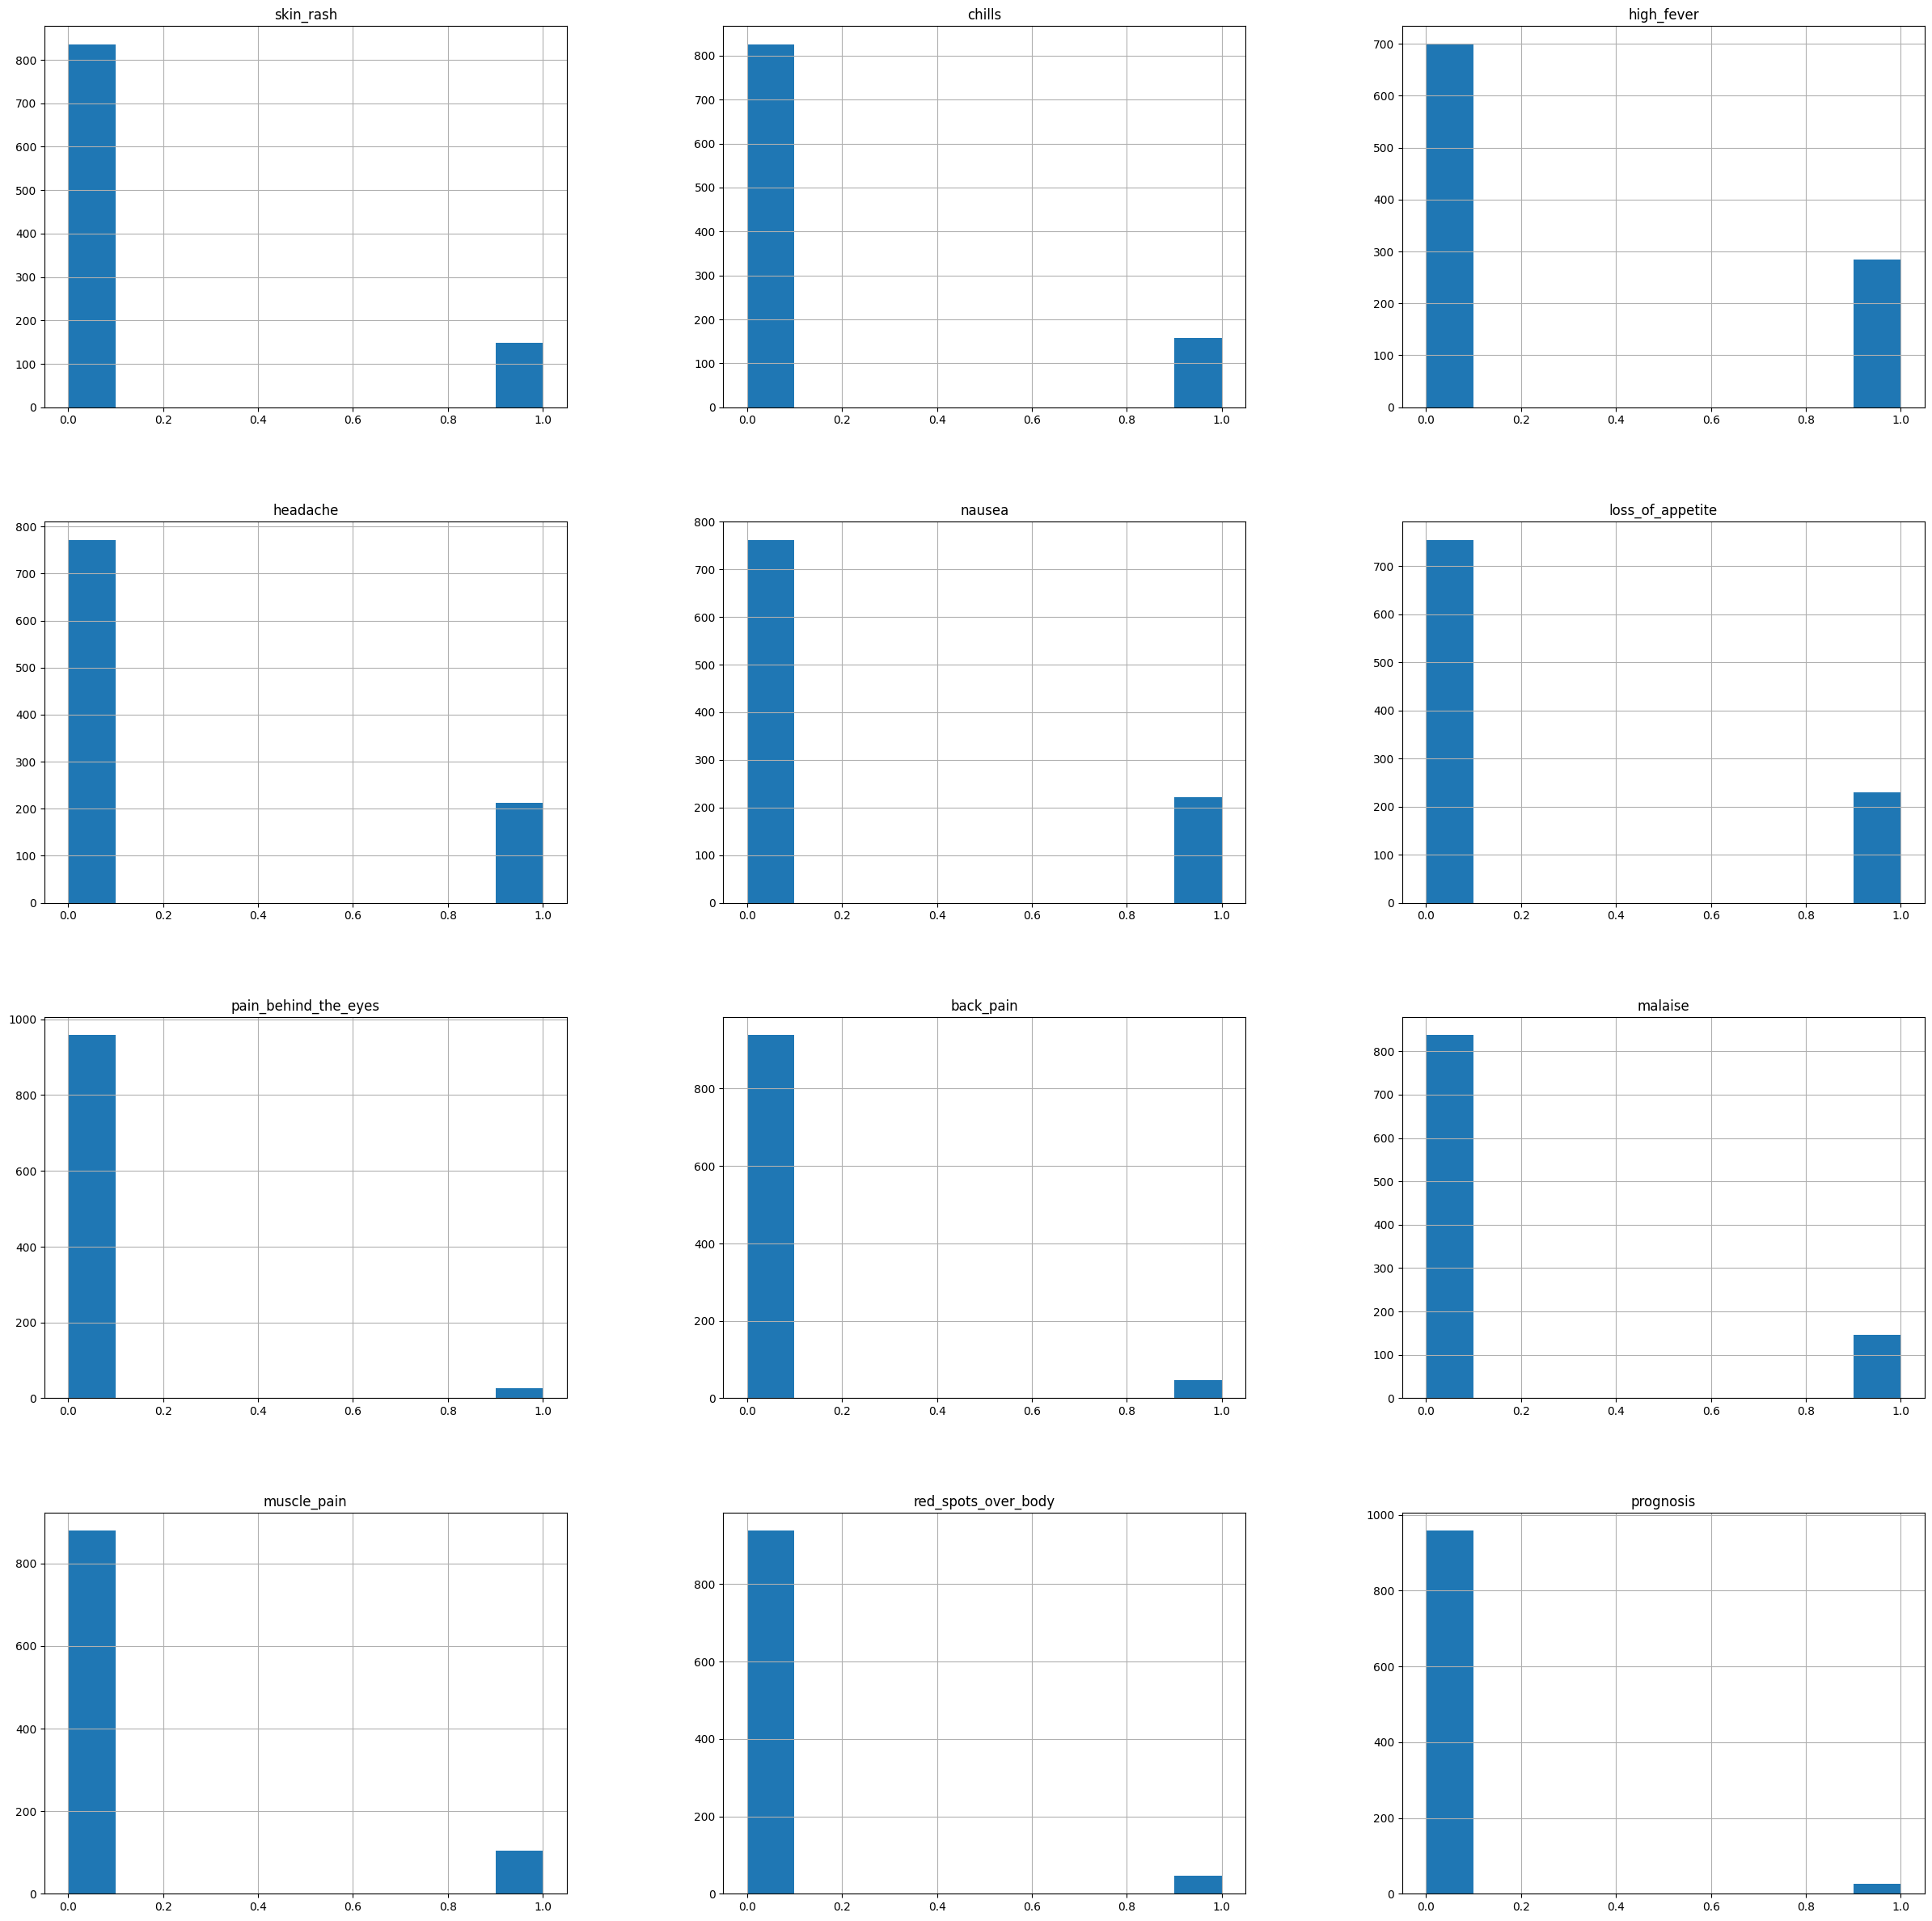

In [71]:
%matplotlib inline
plt.subplots_adjust(left=1.1, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)
test_data.hist(bins=10, figsize=(30,30))
plt.show()

## Explotary Data Analysis (EDA) for testing data

In [72]:
#cheching the null  values of test dataset

In [73]:
test_data.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
prognosis               0
dtype: int64

In [74]:
# Remove the prognosis coloumn from the test dataset

In [75]:
columns_to_drop = ['prognosis']


test_data.drop(columns=columns_to_drop, inplace=True)



In [76]:
## print first five rows of the test dataset after removing the unnecessary columns

In [77]:
testing_prepared_dataset_new_pd =test_data
testing_prepared_dataset_new_pd.tail()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
1101          0       0           0         0       0                 0   
4639          0       0           1         0       0                 0   
3625          1       1           1         1       1                 1   
378           1       0           0         0       0                 0   
495           0       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
1101                     0          0        0            0   
4639                     0          0        0            0   
3625                     1          1        1            1   
378                      0          0        0            0   
495                      0          0        0            0   

      red_spots_over_body  
1101                    0  
4639                    0  
3625                    1  
378                     0  
495                     0

In [78]:
# check the null values again

In [79]:
testing_prepared_dataset_new_pd.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
dtype: int64

In [80]:
## print the first five record again

In [81]:
testing_prepared_dataset_new_pd.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
373           1       0           0         0       0                 0   
4916          1       0           0         0       0                 0   
1550          0       0           0         0       0                 0   
3081          0       0           1         0       0                 0   
3857          0       0           0         0       1                 1   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
373                      0          0        0            0   
4916                     0          0        0            0   
1550                     0          0        0            0   
3081                     0          0        0            0   
3857                     0          0        0            0   

      red_spots_over_body  
373                     0  
4916                    0  
1550                    0  
3081                    0  
3857                    0

In [82]:
testing_prepared_dataset_new_pd.head()

skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
373           1       0           0         0       0                 0   
4916          1       0           0         0       0                 0   
1550          0       0           0         0       0                 0   
3081          0       0           1         0       0                 0   
3857          0       0           0         0       1                 1   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
373                      0          0        0            0   
4916                     0          0        0            0   
1550                     0          0        0            0   
3081                     0          0        0            0   
3857                     0          0        0            0   

      red_spots_over_body  
373                     0  
4916                    0  
1550                    0  
3081                    0  
3857                    0

In [93]:
# use the symptoms from the testing dataset
test_symptoms_column = testing_prepared_dataset_new_pd[["skin_rash","chills","high_fever",
                                                      "headache", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain", "malaise", 
                                                     "muscle_pain", "red_spots_over_body"]]


# Predictions on the test set
test_set_predictions = voting_clf.predict( testing_prepared_dataset_new_pd)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "skin_rash": test_symptoms_column.iloc[:, 0],  
    "chills": test_symptoms_column.iloc[:, 1],  
    "high_fever": test_symptoms_column.iloc[:, 2],
    "headache": test_symptoms_column.iloc[:, 3],
    "nausea": test_symptoms_column.iloc[:, 4],
    "loss_of_appetite": test_symptoms_column.iloc[:, 5],
    "pain_behind_the_eyes": test_symptoms_column.iloc[:, 6],
    "back_pain": test_symptoms_column.iloc[:, 7],
    "malaise": test_symptoms_column.iloc[:, 8],
    "muscle_pain": test_symptoms_column.iloc[:, 9],
    "red_spots_over_body": test_symptoms_column.iloc[:, 10],
    "Prognosis": test_set_predictions
})

# Save submission DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)
print(submission_df)


      skin_rash  chills  high_fever  headache  nausea  loss_of_appetite  \
373           1       0           0         0       0                 0   
4916          1       0           0         0       0                 0   
1550          0       0           0         0       0                 0   
3081          0       0           1         0       0                 0   
3857          0       0           0         0       1                 1   
...         ...     ...         ...       ...     ...               ...   
1101          0       0           0         0       0                 0   
4639          0       0           1         0       0                 0   
3625          1       1           1         1       1                 1   
378           1       0           0         0       0                 0   
495           0       0           0         0       0                 0   

      pain_behind_the_eyes  back_pain  malaise  muscle_pain  \
373                      0          

In [84]:
## test model by using sample data of test dataset

In [94]:
#0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0
#0,0,0,1,1,1,1,1,1,1,1
# 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
# 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1
# 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
# 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0   
# 1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0
# 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0
# 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
# 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1
# 1,0,1,1,0,1,0, 0, 0, 1,0
# 0,0,0,0,0,0,1,1,1,1,1
# 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0
pred = voting_clf.predict([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])

if pred[0] == 0:
  print("Dengue is not infected")
else:
  print("Dengue is infected")

Dengue is not infected


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [95]:
# Import the pickle file

# create pikel file
import pickle

pickle.dump(voting_clf, open('./DengueDetectionModel.h5', 'wb'))